In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
ratings_data = "/scratch/work/courses/DSGA1004-2021/movielens/ml-latest-small/ratings.csv"

In [3]:
#converting to CSV file
ratings_csv = pd.read_csv(ratings_data, sep=',', encoding='latin-1')
print('Shape of ratings:{}'.format(ratings_csv.shape))
ratings_csv.head()

Shape of ratings:(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#checking for null values
ratings_csv.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [5]:
ratings_csv.describe(include='all')

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


<AxesSubplot:xlabel='rating', ylabel='Density'>

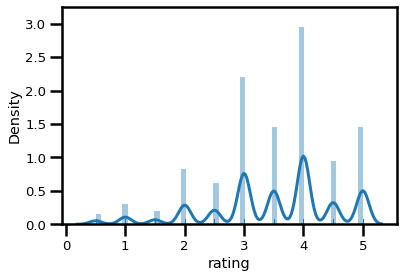

In [8]:
sns.set_context('poster', font_scale = 0.60)
sns.distplot(ratings_csv['rating'], rug = True)

In [7]:
movies_data = "/scratch/work/courses/DSGA1004-2021/movielens/ml-latest-small/movies.csv"

In [8]:
#converting to CSV file
movies_csv = pd.read_csv(movies_data, sep=',', encoding='latin-1')
print('Shape of movies:{}'.format(movies_csv.shape))
movies_csv.head()

Shape of movies:(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
#checking for null values
movies_csv.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
movies_csv.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,War of the Worlds (2005),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


In [16]:
#one-hot encoding
genres=[]
for i in range(len(movies_csv.genres)):
    for x in movies_csv.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    movies_csv[x] = 0
for i in range(len(movies_csv.genres)):
    for x in movies_csv.genres[i].split('|'):
        movies_csv[x][i]=1
        
movies_csv

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
join = pd.merge(ratings_csv, movies_csv, on = 'movieId')
join.head(5)

,userId,movieId,rating,title,genres,Adventure,Animation,Children,Comedy,Fantasy,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
genres_count = {}
for i in movies_csv.columns[4:23]:
    genres_count[i] = movies_csv[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i, genres_count[i]))

Animation    				611
Children    				664
Comedy    				3756
Fantasy    				779
Romance    				1596
Drama    				4361
Action    				1828
Crime    				1199
Thriller    				1894
Horror    				978
Mystery    				573
Sci-Fi    				980
War    				382
Musical    				334
Documentary    				440
IMAX    				158
Western    				167
Film-Noir    				87
(no genres listed)    				34


<BarContainer object of 19 artists>

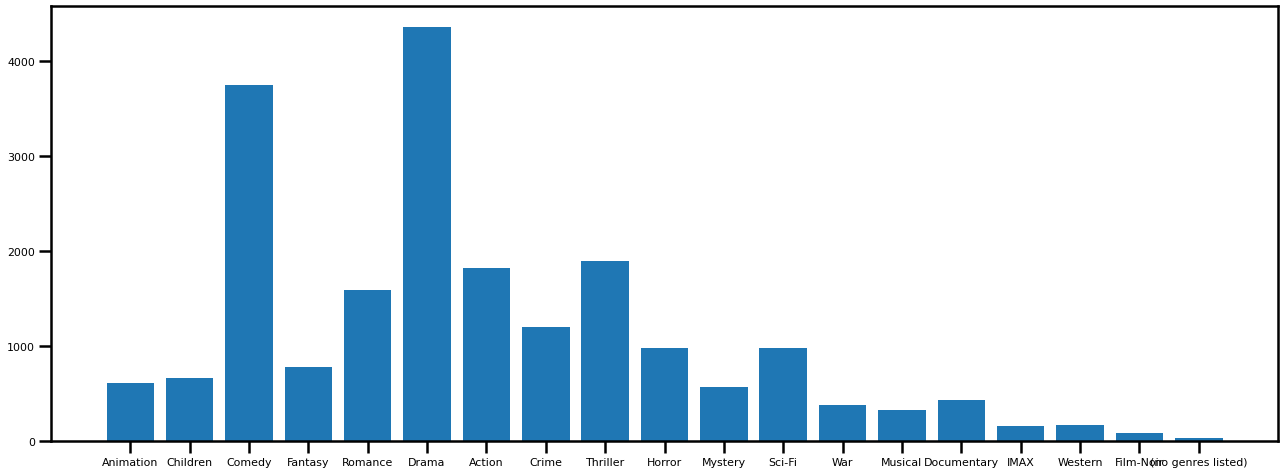

In [51]:
keys = genres_count.keys()
vals = genres_count.values()
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(8)
plt.bar(keys, vals)

In [21]:
join.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [22]:
join.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

In [24]:
data = pd.DataFrame(join.groupby('title')['rating'].mean())

In [25]:
data['number of ratings'] = pd.DataFrame(join.groupby('title')['rating'].count()

In [26]:
data.head(10)

,rating,number of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42
